# IMPORTS AND INSTALLS

In [404]:
!pip3 install smogn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [405]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.preprocessing import StandardScaler as SS
import re
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import smogn

In [406]:
ss=SS()

# DATA CLEANING AND SYNTHETIC DATA PREP
**df -> synthetic dataframe**<br>
**df_org-> orginal dataframe**

In [407]:
df_org=pd.read_csv('../train_data_329x19.csv')
df_org.drop(axis=1,labels='Unnamed: 0',inplace=True)
df_org.dropna(axis=0,inplace=True)
df_org.loc[df_org.cho>2000]
df_org.replace(to_replace=2180.0,value=218,inplace=True)
df_org.reset_index(drop=True,inplace=True)
df_org['patient_age']=df_org['patient_age'].astype(int)
df = smogn.smoter(
    
    ## main arguments
    data = df_org,           ## pandas dataframe
    y = 'cho',          ## string ('header name')
    k =2,                    ## positive integer (k < n)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    rel_thres = 0.95,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'both',   ## string ('low' or 'both' or 'high')
    rel_coef = 2.25          ## positive real number (0 < R)
)
df= df.round(2)
x=df.iloc[:,:13]

y=df.iloc[:,14:15]

y
x_val=df_org.iloc[:,:13]

y_val=df_org.iloc[:,14:15]
df.shape


synth_matrix: 100%|##########| 4/4 [00:00<00:00,  7.51it/s]


(641, 19)

In [408]:
y.describe()

,cho
count,641.000000
mean,291.045663
std,69.116354
min,164.000000
25%,221.000000
50%,307.000000
75%,344.090000
max,401.240000


array([[<AxesSubplot:title={'center':'cho'}>]], dtype=object)

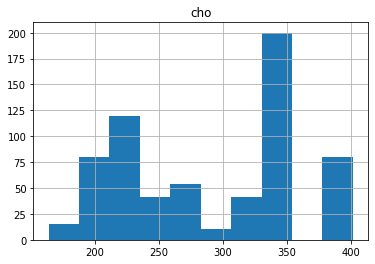

In [409]:
y.hist(bins=10)

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 324
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_age     641 non-null    int64  
 1   patient_gender  641 non-null    int64  
 2   Ht              641 non-null    float64
 3   Wt              641 non-null    float64
 4   HB              641 non-null    float64
 5   UREA            641 non-null    float64
 6   CR              641 non-null    float64
 7   Na              641 non-null    float64
 8   K               641 non-null    float64
 9   FBS             641 non-null    float64
 10  HBA1C           641 non-null    float64
 11  SGOT            641 non-null    float64
 12  SGPT            641 non-null    float64
 13  calories        641 non-null    float64
 14  cho             641 non-null    float64
 15  Fat             641 non-null    float64
 16  pro             641 non-null    float64
 17  fluids          641 non-null    flo

In [411]:
df_org.describe()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.00000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,55.652308,0.606154,159.876615,66.876862,13.294492,84.096277,1.038708,134.978462,4.088862,83.846154,6.49280,24.186154,26.158954,1659.036923,229.358462,27.226154,66.273846,29.055692,5.673846
std,18.460478,0.489355,6.428141,9.200941,2.177099,36.993946,0.794877,2.754821,0.350768,10.946321,1.91834,10.665496,12.622462,247.451152,31.447315,3.823283,7.452448,136.173058,1.828637
min,10.000000,0.000000,135.000000,25.900000,6.580000,10.000000,0.530000,124.000000,2.400000,83.000000,4.60000,7.500000,6.700000,150.000000,164.000000,2.500000,43.000000,1.000000,0.000000
25%,43.000000,0.000000,156.000000,63.000000,12.300000,41.400000,0.860000,135.000000,4.100000,83.000000,5.29000,22.800000,24.800000,1520.000000,209.000000,25.000000,62.000000,2.500000,5.000000
50%,58.000000,1.000000,160.000000,68.000000,13.700000,106.040000,0.890000,135.000000,4.100000,83.000000,5.80000,22.800000,24.800000,1610.000000,221.000000,26.800000,67.000000,2.900000,6.000000
75%,70.000000,1.000000,163.500000,71.700000,14.800000,106.970000,0.960000,135.000000,4.100000,83.000000,6.97000,22.800000,24.800000,1820.000000,250.000000,30.000000,70.000000,3.000000,7.000000
max,94.000000,1.000000,180.000000,98.500000,17.300000,200.700000,9.780000,157.000000,6.700000,276.000000,14.60000,133.000000,170.000000,2500.000000,400.000000,42.000000,90.000000,800.000000,8.000000


In [412]:
df.describe()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000
mean,34.976599,0.489860,153.590905,56.709298,12.089532,64.419251,0.918580,135.234649,4.168471,83.429017,6.010733,23.007972,23.097285,2010.819204,291.045663,33.378674,70.329782,16.272278,6.697504
std,25.018264,0.500288,11.037142,16.634050,2.112854,42.029708,0.582924,2.348867,0.299453,7.799942,1.475654,8.364882,10.129590,415.259294,69.116354,7.120075,7.235769,97.754092,1.692582
min,9.000000,0.000000,135.000000,25.900000,6.580000,10.000000,0.530000,124.000000,2.400000,83.000000,4.600000,7.500000,6.700000,150.000000,164.000000,2.500000,43.000000,1.000000,0.000000
25%,11.000000,0.000000,138.500000,37.780000,10.600000,18.840000,0.750000,134.990000,4.100000,83.000000,5.280000,22.750000,16.740000,1610.000000,221.000000,26.500000,67.000000,2.510000,6.000000
50%,23.000000,0.000000,156.000000,63.000000,11.880000,44.000000,0.890000,135.000000,4.100000,83.000000,5.800000,22.800000,24.800000,2085.090000,307.000000,34.720000,70.150000,3.000000,7.010000
75%,59.000000,1.000000,163.500000,71.700000,13.730000,106.470000,0.900000,136.000000,4.200000,83.000000,5.960000,22.830000,24.800000,2406.730000,344.090000,40.170000,75.970000,3.490000,8.000000
max,94.000000,1.000000,180.000000,98.500000,17.300000,200.700000,9.780000,157.000000,6.700000,276.000000,14.600000,133.000000,170.000000,2507.510000,401.240000,42.210000,90.000000,800.000000,8.020000


In [413]:
df.to_csv('oversampled_data.csv')

# TEST TRAIN SPLIT

In [414]:
x_train,x_test,y_train,y_test=train_test_split(x_val,y_val,test_size=0.3);

In [415]:
lr=LinearRegression(fit_intercept=True)
en=ElasticNet()
rf=RandomForestRegressor(n_estimators=500,max_depth=3,criterion='absolute_error')
ab=AdaBoostRegressor(n_estimators=100)
gb=GradientBoostingRegressor(n_estimators=100,max_depth=1)
pca=PCA(whiten=True)
lda=LDA()
gpr=GaussianProcessRegressor(kernel=WhiteKernel()+DotProduct())
lgr=LogisticRegression()
svr=SVR(gamma='auto',kernel='rbf')

In [416]:
lr.fit(x_train,y_train.values.ravel())
en.fit(x_train,y_train.values.ravel())
rf.fit(x_train,y_train.values.ravel())
ab.fit(x_train,y_train.values.ravel())
gb.fit(x_train,y_train.values.ravel())
pca.fit(x_train,y_train.values.ravel())
#lda.fit(x_tr,y_tr.values.reshape(-1,1))
gpr.fit(x_train,y_train.values.ravel())
svr.fit(x_train,y_train.values.ravel())

SVR(gamma='auto')

# TRAIN ACC WITH ORGINAL DATASET

In [417]:
print("TRAIN ACC:")
#fh.write("TRAIN ACC - BEFORE FEATURE SELECTION:\n")
print('LR acc: ',lr.score(x_train,y_train.values.ravel()))
print('ElasticNet acc: ',en.score(x_train,y_train.values.ravel()))
print('RandomForest acc: ',rf.score(x_train,y_train.values.ravel()))
print('AdaBoost acc: ',ab.score(x_train,y_train.values.ravel()))
print('GradientBoost acc: ',gb.score(x_train,y_train.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(x_train,y_train.values.ravel()))+"\n")

print("PCA acc: ",pca.score(x_train,y_train.values.ravel()))
print("GPR acc: ",gpr.score(x_train,y_train.values.ravel()))
print("SVR acc: ",svr.score(x_train,y_train.values.ravel()))


TRAIN ACC:
LR acc:  0.59437858725832
ElasticNet acc:  0.5216162225203202
RandomForest acc:  0.7534624475289408
AdaBoost acc:  0.7814467917459228
GradientBoost acc:  0.7565374013252154
PCA acc:  -53.52607734183082
GPR acc:  0.48891414582891524
SVR acc:  -0.0052454615538091165


# TEST ACC AFTER TRAIN WITH ORGINAL DATASET

In [418]:
print("TEST ACC:")
#fh.write("TEST ACC - BEFORE FEATURE SELECTION:\n")

print('LR acc: ',lr.score(x_test,y_test.values.ravel()))
print('ElasticNet acc: ',en.score(x_test,y_test.values.ravel()))
print('RandomForest acc: ',rf.score(x_test,y_test.values.ravel()))
print('AdaBoost acc: ',ab.score(x_test,y_test.values.ravel()))
print('GradientBoost acc: ',gb.score(x_test,y_test.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(x_test,y_test.values.ravel()))+"\n")
print("PCA acc: ",pca.score(x_test,y_test.values.ravel()))
print("GPR acc: ",gpr.score(x_test,y_test.values.ravel()))
print("SVR acc: ",svr.score(x_test,y_test.values.ravel()))


TEST ACC:
LR acc:  0.4022319205519733
ElasticNet acc:  0.06550844664596589
RandomForest acc:  0.7200772959910268
AdaBoost acc:  0.561872502042333
GradientBoost acc:  0.7357668979112121
PCA acc:  -87.04215472959109
GPR acc:  -0.14466609040426737
SVR acc:  0.01503081153310104


# TRAIN SYNTHETIC TEST ORGINAL

In [419]:
lr=LinearRegression(fit_intercept=True)
en=ElasticNet()
rf=RandomForestRegressor(n_estimators=500,max_depth=3,criterion='absolute_error')
ab=AdaBoostRegressor(n_estimators=100)
gb=GradientBoostingRegressor(n_estimators=100,max_depth=1)
pca=PCA(whiten=True)
lda=LDA()
gpr=GaussianProcessRegressor(kernel=WhiteKernel()+DotProduct())
lgr=LogisticRegression()
svr=SVR(gamma='auto',kernel='rbf')

In [420]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0);

In [421]:
x

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT
0,11,0,138.27,36.90,9.20,37.00,0.89,133.00,4.59,83.0,5.31,22.99,24.84
1,12,1,138.18,37.64,9.21,37.64,0.89,132.93,4.60,83.0,5.30,22.53,24.88
2,12,0,137.85,37.12,9.16,38.85,0.89,132.97,4.60,83.0,5.30,22.82,24.72
3,12,1,137.81,37.31,9.15,37.12,0.89,133.04,4.60,83.0,5.31,22.77,24.84
4,12,1,137.70,37.42,9.19,37.52,0.89,133.03,4.60,83.0,5.30,22.87,24.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,57,1,160.00,51.00,13.91,105.15,0.89,135.00,4.10,83.0,5.80,22.80,24.80
321,27,1,164.00,74.00,16.11,105.92,0.86,135.00,4.10,83.0,5.18,22.80,24.80
322,48,1,159.00,68.50,16.57,105.60,0.87,135.00,4.10,83.0,7.31,22.80,24.80
323,85,1,163.00,78.00,16.43,107.76,0.85,135.00,4.10,83.0,5.80,22.80,24.80


In [422]:
y

,cho
0,329.93
1,329.32
2,329.87
3,330.34
4,330.33
...,...
320,229.00
321,248.00
322,260.00
323,238.00


In [423]:
lr.fit(x,y.values.ravel())
en.fit(x,y.values.ravel())
rf.fit(x,y.values.ravel())
ab.fit(x,y.values.ravel())
gb.fit(x,y.values.ravel())
pca.fit(x,y.values.ravel())
#lda.fit(x_tr,y_tr.values.reshape(-1,1))
gpr.fit(x,y.values.ravel())
svr.fit(x,y.values.ravel())

SVR(gamma='auto')

# ACC WITH SYNTHETIC DATA

In [424]:
print('LR acc: ',lr.score(x,y.values.ravel()))
print('ElasticNet acc: ',en.score(x,y.values.ravel()))
print('RandomForest acc: ',rf.score(x,y.values.ravel()))
print('AdaBoost acc: ',ab.score(x,y.values.ravel()))
print('GradientBoost acc: ',gb.score(x,y.values.ravel()))

#fh.write("Gradient Boosting acc: "+str(gb.score(x,y.values.ravel()))+"\n")
print("PCA acc: ",pca.score(x,y.values.ravel()))
print("GPR acc: ",gpr.score(x,y.values.ravel()))
print("SVR acc: ",svr.score(x,y.values.ravel()))

LR acc:  0.7900505618148084
ElasticNet acc:  0.7885860336049375
RandomForest acc:  0.9602944577244065
AdaBoost acc:  0.9615819179442952
GradientBoost acc:  0.9430522144715973
PCA acc:  -55.03495634950778
GPR acc:  0.7877547115664496
SVR acc:  0.5960521516301888


# ACC WITH ACTUAL DATA

In [425]:
print('LR acc: ',lr.score(x_val,y_val.values.ravel()))
print('ElasticNet acc: ',en.score(x_val,y_val.values.ravel()))
print('RandomForest acc: ',rf.score(x_val,y_val.values.ravel()))
print('AdaBoost acc: ',ab.score(x_val,y_val.values.ravel()))
print('GradientBoost acc: ',gb.score(x_val,y_val.values.ravel()))

#fh.write("Gradient Boosting acc: "+str(gb.score(x_val,y_val.values.ravel()))+"\n")
print("PCA acc: ",pca.score(x_val,y_val.values.ravel()))
print("GPR acc: ",gpr.score(x_val,y_val.values.ravel()))
print("SVR acc: ",svr.score(x_val,y_val.values.ravel()))

LR acc:  -0.5380365542317342
ElasticNet acc:  -0.5460470774531558
RandomForest acc:  0.6313900369782238
AdaBoost acc:  0.7445780066645216
GradientBoost acc:  0.48399920266761487
PCA acc:  -61.71442777033715
GPR acc:  -0.5420381161765317
SVR acc:  -2.1135278532915254


# RMSE WHEN PREDICTING WITH ACTUAL DATA

In [426]:

print('LR acc: ',metrics.mean_squared_error(y_val,lr.predict(x_val))**0.5)
print('ElasticNet acc: ',metrics.mean_squared_error(y_val,en.predict(x_val))**0.5)
print('RandomForest acc: ',metrics.mean_squared_error(y_val,rf.predict(x_val))**0.5)
print('AdaBoost acc: ',metrics.mean_squared_error(y_val,ab.predict(x_val))**0.5)
print('GradientBoost acc: ',metrics.mean_squared_error(y_val,gb.predict(x_val))**0.5)

#fh.write("Gradient Boosting acc: "+str(metrics.mean_squared_error(y_val,lr.predict(x_val))**0.5)+"\n")
#print("PCA acc: ",metrics.mean_squared_error(y_val,pca.predict(x_val)**0.5))
print("GPR acc: ",metrics.mean_squared_error(y_val,gpr.predict(x_val)**0.5))
print("SVR acc: ",metrics.mean_squared_error(y_val,svr.predict(x_val)**0.5))

LR acc:  38.940159098186044
ElasticNet acc:  39.04143300683662
RandomForest acc:  19.063293203834686
AdaBoost acc:  15.868779947566349
GradientBoost acc:  22.55483109906754
GPR acc:  46682.0089285867
SVR acc:  46231.59024179014


# CONCLUSION:
- Boosting models perform better
- training with synthetic data and predicting with the actual data provides better results than just training and predicting with the original dataset 